# Lecture 27: Designing Experiments

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Main result of previous lecture

In [2]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


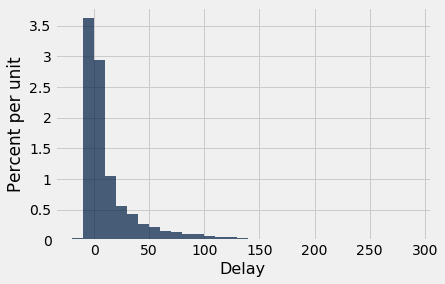

In [3]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [4]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [5]:
"""Empirical distribution of random sample means"""

def sample_means(sample_size):
    
    repetitions = 10000
    means = make_array()

    for i in range(repetitions):
        sampled_flights = united.sample(sample_size)
        sample_mean = np.mean(sampled_flights.column('Delay'))
        means = np.append(means, sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print('Repetitions :', repetitions)
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Repetitions : 10000
Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.645750749999998
Population SD: 39.480199851609314
SD of sample means: 1.987412729404599


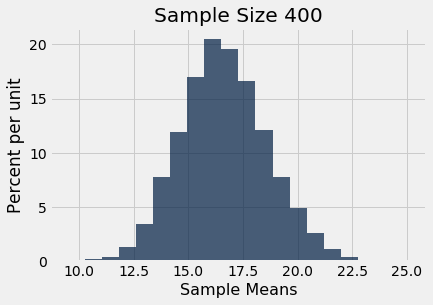

In [6]:
sample_means(400)

In [7]:
sd_delay = np.std(delays)
sd_delay

39.480199851609314

In [8]:
sd_delay/np.sqrt(400)

1.9740099925804657

Repetitions : 10000
Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.701738400000004
Population SD: 39.480199851609314
SD of sample means: 1.5962370572560454


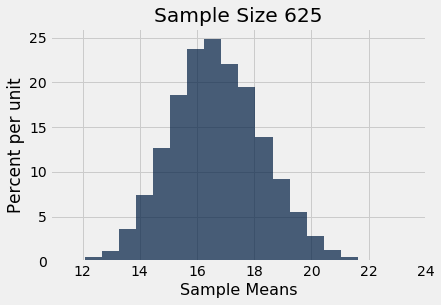

In [9]:
sample_means(625)

In [10]:
sd_delay/np.sqrt(625)

1.5792079940643726

In [11]:
repetitions = 10000
sample_sizes = np.arange(50, 401, 50)

sd_of_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(united.sample(n).column('Delay')))
    sd_of_means = np.append(sd_of_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_of_means,
    'Population_SD/sqrt(n)', sd_delay/np.sqrt(sample_sizes)
)

In [12]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",Population_SD/sqrt(n)
50,5.58347,5.58334
100,3.96038,3.94802
150,3.18642,3.22354
200,2.78452,2.79167
250,2.47628,2.49695
300,2.2818,2.27939
350,2.10866,2.11031
400,1.98222,1.97401


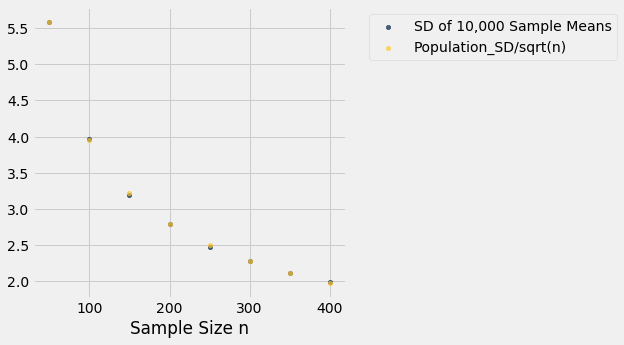

In [13]:
sd_comparison.scatter('Sample Size n')

## SD of 0/1 Population ##

In [14]:
ones = 5
population = np.append(np.ones(ones), np.zeros(10 - ones))
population

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [15]:
np.std(population)

0.5

In [16]:
pop_proportions = make_array()
pop_SDs = make_array()

for k in np.arange(1, 10):
    pop_proportions = np.append(pop_proportions, k/10)
    population = np.append(np.ones(k), np.zeros(10 - k))
    pop_SDs = np.append(pop_SDs, np.std(population))
    
sd_table = Table().with_columns(
    'Population Proportion', pop_proportions,
    'Population SD', pop_SDs
)

sd_table

Population Proportion,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


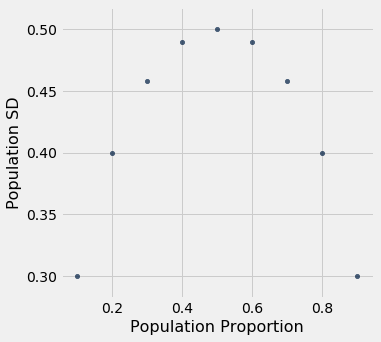

In [17]:
sd_table.scatter(0)